In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Data preparation

In [2]:
NYoil = pd.read_csv('RCLC1d.csv',parse_dates =["Date"], index_col ="Date")
NYoil.rename(columns={'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)':'nyoil'}, inplace=True)
NYoil1 = NYoil.loc['2009-11-16':'2019-09-30']
NYoil=NYoil.loc['1983-04-04':'2019-10-01']
NYoil.head()

,nyoil
Date,
1983-04-04,29.44
1983-04-05,29.71
1983-04-06,29.92
1983-04-07,30.17
1983-04-08,30.38


In [3]:
bond = pd.read_csv('10yeartreasurybondrateyield.csv',parse_dates =["date"], index_col ="date")
bond.rename(columns={'date':'date','value':'10yearbond'}, 
                 inplace=True)
#bond=bond.set_index('date')
bond = bond.loc['2009-11-16':'2019-09-30']    
bond.head()

,10yearbond
date,
2009-11-16,3.33
2009-11-17,3.33
2009-11-18,3.36
2009-11-19,3.35
2009-11-20,3.36


In [4]:
rts = pd.read_csv('RTSI.csv',parse_dates =["Date"], index_col ="Date")
rts.rename(columns={'Date':"date",'Price':'rts'}, 
                 inplace=True)
rts = rts.drop(['Open','High','Low',"Vol.","Change %"], axis =1)
rts = rts.loc['2019-09-30':'2009-11-16']
rts.head()


,rts
Date,
2019-09-30,1333.91
2019-09-27,1347.72
2019-09-26,1359.59
2019-09-25,1354.01
2019-09-24,1358.80


In [5]:
xop = pd.read_csv('XOP.csv',parse_dates =["Date"], index_col ="Date")
xop = xop.drop(['Open','High','Low',"Adj Close","Volume"], axis =1)
xop.rename(columns={'Date':"Date",'Close':'xop'}, 
                 inplace=True)  
xop = xop.loc['2009-11-16':'2019-09-30']
xop.head()

,xop
Date,
2009-11-16,40.209999
2009-11-17,39.759998
2009-11-18,39.360001
2009-11-19,38.360001
2009-11-20,38.060001


In [6]:
cpi = pd.read_csv('CPI.csv',parse_dates =["Label"], index_col ="Label")
cpi = cpi.drop(['Series ID','Year','Period'], axis =1)
cpi.rename(columns={'Value':'cpi'}, inplace=True)
cpi = cpi.resample('D').ffill()
cpi1 = cpi.loc['2009-11-16':'2019-09-30']
cpi=cpi.loc['1983-04-04':'2019-10-01']
cpi.head()

,cpi
Label,
1983-04-04,98.6
1983-04-05,98.6
1983-04-06,98.6
1983-04-07,98.6
1983-04-08,98.6


In [7]:
gold = pd.read_csv('Gold.csv',parse_dates =["date"], index_col ="date")
gold.rename(columns={'date':'date',' value':'Gold'}, 
                 inplace=True)
gold = gold.loc['2009-11-16':'2019-09-30']    
gold.head()

,Gold
date,
2009-11-20,1142.50
2009-11-23,1166.00
2009-11-24,1170.25
2009-11-25,1176.50
2009-11-26,1183.00


In [8]:
money = pd.read_csv('moneybase.csv',parse_dates =["DATE"], index_col ="DATE")
money.rename(columns={'DATE':'DATE','BOGMBASEW':'money'}, 
                 inplace=True)
money = money.loc['2009-11-16':'2019-09-30']    
money.head()

,money
DATE,
2009-11-18,1989940.0
2009-11-25,2072256.0
2009-12-02,2072256.0
2009-12-09,2036838.0
2009-12-16,2036838.0


In [9]:
oil = pd.read_csv('crudeoilprices.csv',parse_dates =["date"], index_col ="date")
oil.rename(columns={'date':'date',' value':'oil'}, 
                 inplace=True)
oil = oil.loc['2009-11-16':'2019-09-30']
oil.head()

,oil
date,
2009-11-16,78.900
2009-11-17,79.256
2009-11-18,79.788
2009-11-19,77.814
2009-11-20,77.320


In [10]:
dj = pd.read_csv('dj.csv',parse_dates =["date"], index_col ="date")
dj.rename(columns={'date':"Date",' value':'dj'}, 
                 inplace=True)  
#dj=dj.set_index('date')
dj = dj.loc['2009-11-16':'2019-09-30']
dj.head()

,dj
date,
2009-11-16,10406.96
2009-11-17,10437.42
2009-11-18,10426.31
2009-11-19,10332.44
2009-11-20,10318.16


In [11]:
from datetime import datetime

infla = pd.read_csv('inflationrate.csv')
infla= infla.drop(['AVE'], axis =1)
infla=infla.set_index('year')
infla = infla.loc[2009:2019] 
infla = infla.T
#inf09 =infla[2009]
inf = infla[2009].append(infla[2010]).append(infla[2011]).append(infla[2012]).append(infla[2013]).append(infla[2014]).append(infla[2015]).append(infla[2016]).append(infla[2017]).append(infla[2018]).append(infla[2019])
index = []
for y in range(2009,2020):
    if y ==2019:
        for m in range(1,11):
            if m == 1 or m == 3 or m == 5 or m == 7 or m == 8 or m == 10 or m == 12:
                for d in range(1,32):
                    index.append(datetime(y, m, d))
            elif m == 4 or m == 6 or m == 9 or m == 11:
                for d in range(1,31):
                    index.append(datetime(y, m, d))
            else:
                for d in range(1,29):
                    index.append(datetime(y, m, d))
        
    else:
        for m in range(1,13):
            if m == 1 or m == 3 or m == 5 or m == 7 or m == 8 or m == 10 or m == 12:
                for d in range(1,32):
                    index.append(datetime(y, m, d))
            elif m == 4 or m == 6 or m == 9 or m == 11:
                for d in range(1,31):
                    index.append(datetime(y, m, d))
            else:
                for d in range(1,29):
                    index.append(datetime(y, m, d))
        
inflarate = []
for n in inf:
    for i in range(31):
        inflarate.append(n)
        
my_dict = dict(index = np.array(index),inflarate = np.array(inflarate) )
inflation = pd.DataFrame.from_dict(my_dict, orient='index')
inflation=inflation.transpose()
inflation.rename(columns={'index':"date",'inflarate':'inf'}, 
                 inplace=True)
inflation = inflation.set_index("date")
inflation = inflation.loc['2009-11-16':'2019-10-31']
inflation.head()

,inf
date,
2009-11-16,0.0184
2009-11-17,0.0184
2009-11-18,0.0184
2009-11-19,0.0184
2009-11-20,0.0184


In [12]:
finaldata= pd.concat([NYoil1,bond,rts,xop,cpi1,gold,money], axis=1)
finaldata.head()


,nyoil,10yearbond,rts,xop,cpi,Gold,money
2009-11-16,78.90,3.33,1481.82,40.209999,216.33,NaN,NaN
2009-11-17,79.14,3.33,1472.76,39.759998,216.33,NaN,NaN
2009-11-18,79.58,3.36,1486.62,39.360001,216.33,NaN,1989940.0
2009-11-19,77.46,3.35,1451.20,38.360001,216.33,NaN,NaN
2009-11-20,76.72,3.36,1436.44,38.060001,216.33,1142.5,NaN


In [13]:
finaldata.isnull().sum()

nyoil         1112
10yearbond    1127
rts           1123
xop           1122
cpi              0
Gold          1101
money         3091
dtype: int64

In [14]:
finaldata=finaldata.fillna(method='pad')
finaldata.isnull().sum()

nyoil         0
10yearbond    0
rts           0
xop           0
cpi           0
Gold          4
money         2
dtype: int64

In [15]:
finaldata = finaldata.dropna()
finaldata.head()

,nyoil,10yearbond,rts,xop,cpi,Gold,money
2009-11-20,76.72,3.36,1436.44,38.060001,216.33,1142.50,1989940.0
2009-11-21,76.72,3.36,1436.44,38.060001,216.33,1142.50,1989940.0
2009-11-22,76.72,3.36,1436.44,38.060001,216.33,1142.50,1989940.0
2009-11-23,77.56,3.37,1466.77,38.480000,216.33,1166.00,1989940.0
2009-11-24,76.02,3.32,1447.23,38.720001,216.33,1170.25,1989940.0


In [16]:
longdata= pd.concat([NYoil,cpi], axis=1)
longdata.head()

,nyoil,cpi
1983-04-04,29.44,98.6
1983-04-05,29.71,98.6
1983-04-06,29.92,98.6
1983-04-07,30.17,98.6
1983-04-08,30.38,98.6


In [17]:
longdata.isnull().sum()

nyoil    4160
cpi         0
dtype: int64

In [18]:
longdata=longdata.fillna(method='pad')
longdata.isnull().sum()

nyoil    0
cpi      0
dtype: int64

# Data understanding

D:\pythonprogram\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


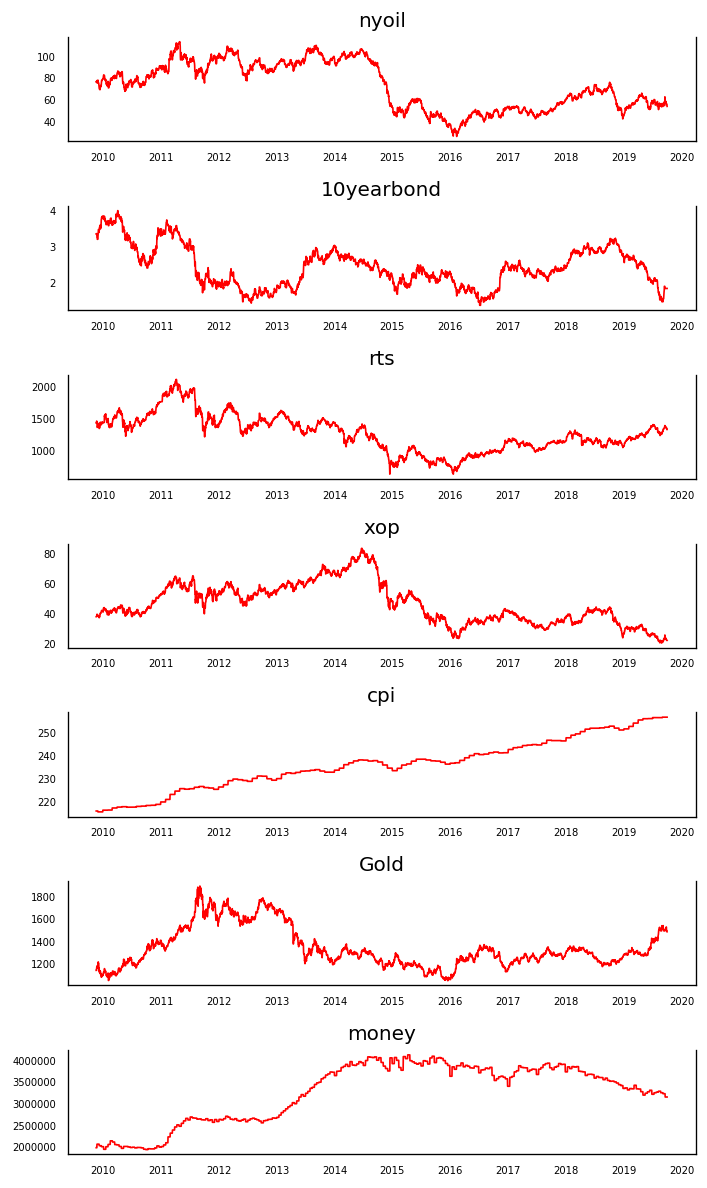

In [19]:
from pandas.plotting import register_matplotlib_converters
# Plot
fig, axes = plt.subplots(nrows=7, ncols=1, dpi=120, figsize=(6,10))
for i, ax in enumerate(axes.flatten()):
 data = finaldata[finaldata.columns[i]]
 ax.plot(data, color='red', linewidth=1)
# Decorations
 ax.set_title(finaldata.columns[i])
 ax.xaxis.set_ticks_position('none')
 ax.yaxis.set_ticks_position('none')
 ax.spines['top'].set_alpha(0)
 ax.tick_params(labelsize=6)
plt.tight_layout();
plt.savefig('varplot.png')

## check Normality

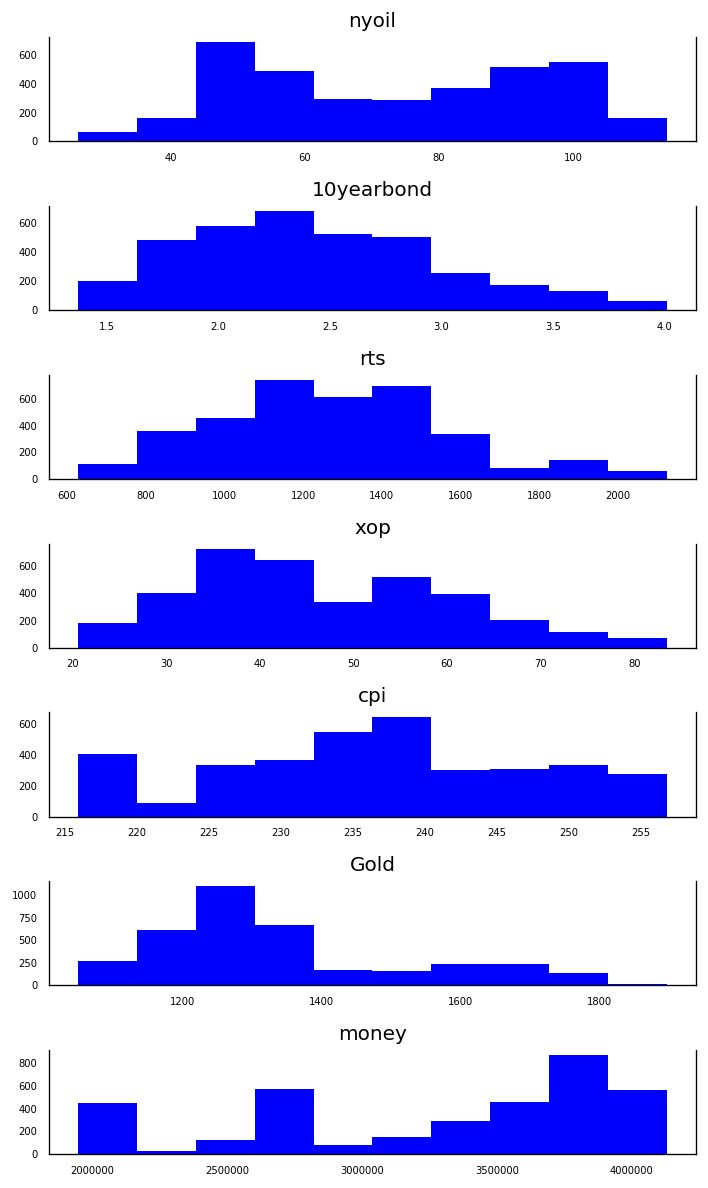

In [20]:
from pandas.plotting import register_matplotlib_converters
# Plot
fig, axes = plt.subplots(nrows=7, ncols=1, dpi=120, figsize=(6,10))
for i, ax in enumerate(axes.flatten()):
    data = finaldata[finaldata.columns[i]]
    ax.hist(data, color='blue', linewidth=1)
# Decorations
    ax.set_title(finaldata.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout();
plt.savefig('checkNor.png')

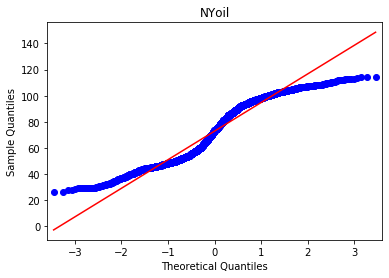

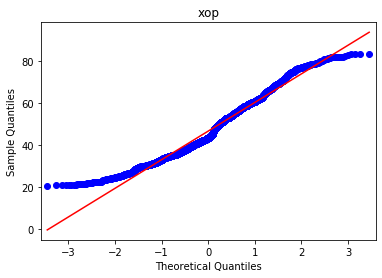

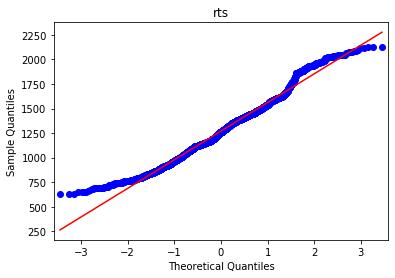

In [21]:
from statsmodels.graphics.gofplots import qqplot
qqplot(finaldata["nyoil"], line='s')
plt.title("NYoil")
plt.show()
qqplot(finaldata["xop"], line='s')
plt.title("xop")
plt.show()
qqplot(finaldata["rts"], line='s')
plt.title("rts")
plt.show()

In [22]:
from scipy.stats import normaltest
for i in range(7):
    # normality test
    data = finaldata[finaldata.columns[i]]
    stat, p = normaltest(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=59637.951, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=154.200, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=77.406, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=198.367, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=215.435, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=402.899, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=1071.591, p=0.000
Sample does not look Gaussian (reject H0)


## check correlation  

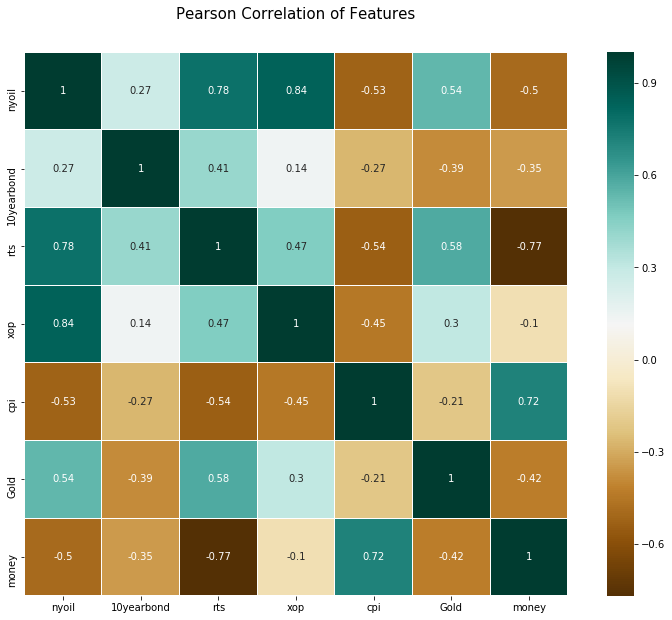

In [23]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(finaldata.astype(float).corr(), cmap = "BrBG",
linewidths=0.1, square=True, linecolor='white',
annot=True)
plt.savefig('var_corr.png')
plt.show()

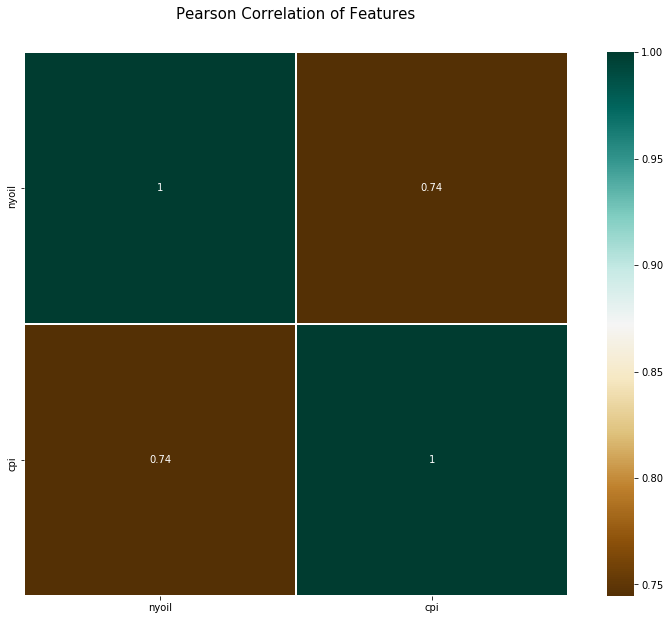

In [24]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(longdata.astype(float).corr(), cmap = "BrBG",
linewidths=0.1, square=True, linecolor='white',
annot=True)
plt.savefig('var_corr1.png')
plt.show()

## chack AR or MA 

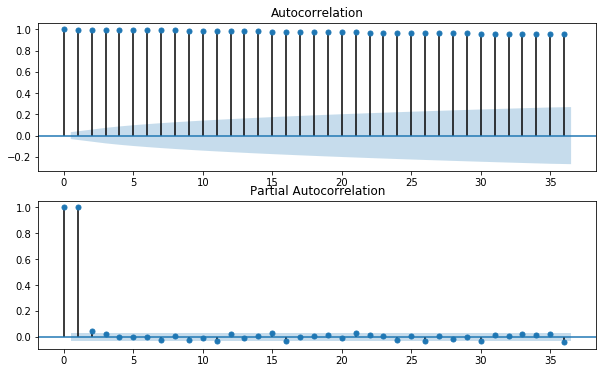

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0] = plot_acf(finaldata.nyoil, ax=ax[0])
ax[1] = plot_pacf(finaldata.nyoil, ax=ax[1])

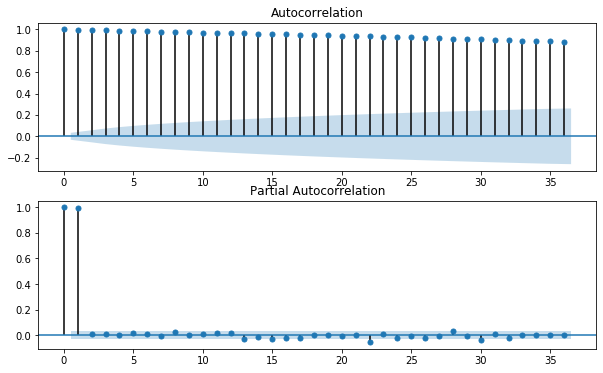

In [26]:
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0] = plot_acf(finaldata['10yearbond'], ax=ax[0])
ax[1] = plot_pacf(finaldata['10yearbond'], ax=ax[1])

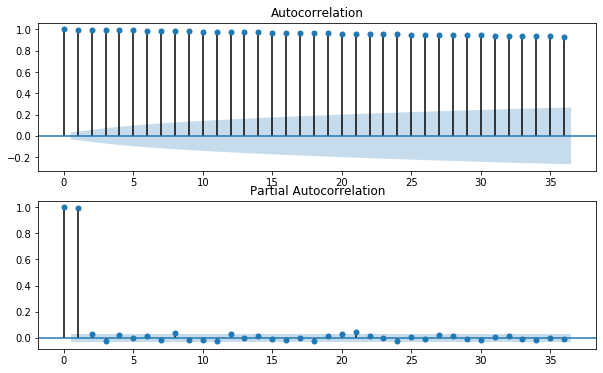

In [27]:
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0] = plot_acf(finaldata['xop'], ax=ax[0])
ax[1] = plot_pacf(finaldata['xop'], ax=ax[1])

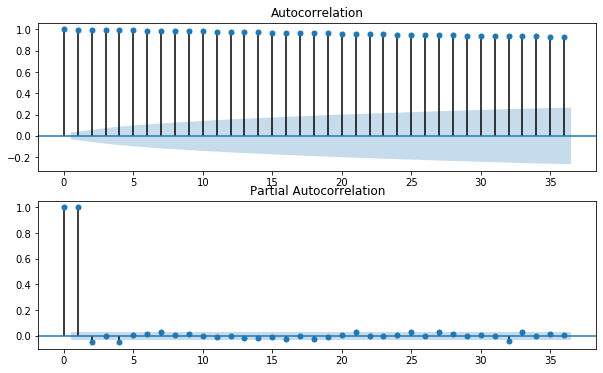

In [28]:
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0] = plot_acf(finaldata['rts'], ax=ax[0])
ax[1] = plot_pacf(finaldata['rts'], ax=ax[1])

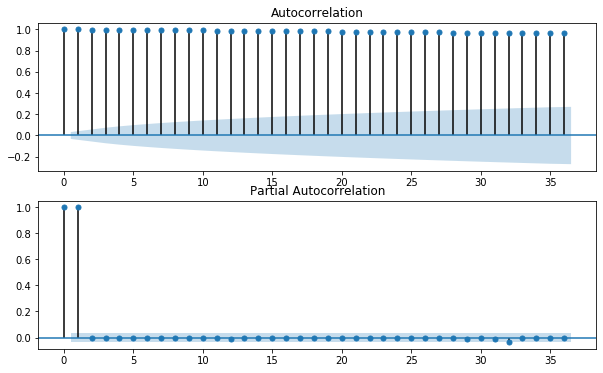

In [29]:
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0] = plot_acf(finaldata['cpi'], ax=ax[0])
ax[1] = plot_pacf(finaldata['cpi'], ax=ax[1])

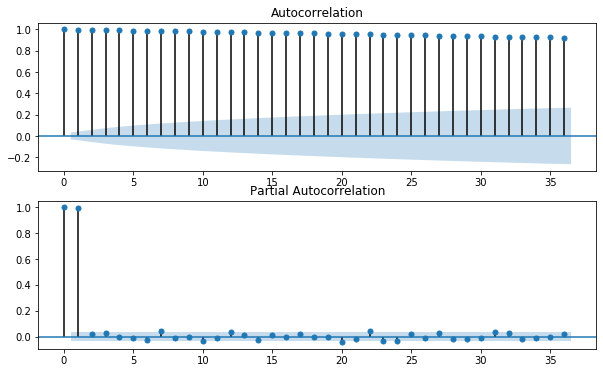

In [30]:
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0] = plot_acf(finaldata['Gold'], ax=ax[0])
ax[1] = plot_pacf(finaldata['Gold'], ax=ax[1])

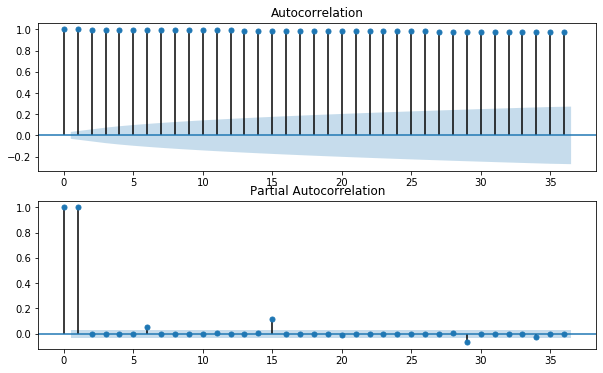

In [31]:
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0] = plot_acf(finaldata['money'], ax=ax[0])
ax[1] = plot_pacf(finaldata['money'], ax=ax[1])

## split into training and testing data 

In [32]:
nobs = 300
X_train, X_test = finaldata[0:-nobs], finaldata[-nobs:]

print(X_train.shape)
print(X_test.shape)

(3302, 7)
(300, 7)


## De-Trend  (use difference-stationary)

In [33]:
detrend_data=X_train.diff().dropna()
detrend_data.head()

,nyoil,10yearbond,rts,xop,cpi,Gold,money
2009-11-21,0.00,0.00,0.00,0.000000,0.0,0.00,0.0
2009-11-22,0.00,0.00,0.00,0.000000,0.0,0.00,0.0
2009-11-23,0.84,0.01,30.33,0.419999,0.0,23.50,0.0
2009-11-24,-1.54,-0.05,-19.54,0.240001,0.0,4.25,0.0
2009-11-25,1.94,-0.04,-19.68,0.959999,0.0,6.25,82316.0


In [34]:
detrend_data.describe()

,nyoil,10yearbond,rts,xop,cpi,Gold,money
count,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000
mean,-0.007110,-0.000136,-0.084992,-0.001618,0.010573,0.029309,440.387155
std,1.121419,0.041196,17.937239,0.798329,0.138562,11.747653,18758.310655
min,-9.440000,-0.200000,-152.210000,-7.379997,-1.339000,-133.500000,-248760.000000
25%,-0.370000,-0.020000,-5.720000,-0.250000,0.000000,-3.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.410000,0.017700,6.210000,0.279999,0.000000,3.750000,0.000000
max,7.370000,0.210000,108.450000,4.349998,2.158000,80.750000,314469.000000


## test the stationary --Augmented Dickey-Fuller Test

In [35]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name="", verbose=False):
    r = adfuller(series, autolag="AIC")
    output ={'test_statistic':round(r[0],4), "pvalue":round(r[1],4), "n_lags":round(r[2],4),"n_obs":r[3]}
    p_value = output["pvalue"]
    def adjust(val, length=6):return str(val).ljust(length)
    
    #print summary
    print(f"Augmented Dickey-Fuller Test on {name}", "\n","-"*50)
    print(f"Null Hypothesis: Data has unit root. Non-Stationary.")
    print(f"Significance Level   = {signif}")
    print(f"Test Statistic       = ", {output["test_statistic"]})
    print(f"No. Lags Chosen      = ", {output["n_lags"]})
    
    for key,val in r[4].items():
          print(f"Critical value {adjust(key)}={round(val, 3)}")
    
    if p_value<= signif:
          print(f"=> P-Value = {p_value}.Rejecting Null Hypothesis.")
          print(f"=> Series is Stationary.")
    else:
          print(f"=> P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
          print(f"=> Series is Non-Stationary.") 
          
for name, column in detrend_data.iteritems():
    adfuller_test(column, name=name)
    print("\n")    

Augmented Dickey-Fuller Test on nyoil 
 --------------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level   = 0.05
Test Statistic       =  {-58.9203}
No. Lags Chosen      =  {0}
Critical value 1%    =-3.432
Critical value 5%    =-2.862
Critical value 10%   =-2.567
=> P-Value = 0.0.Rejecting Null Hypothesis.
=> Series is Stationary.


Augmented Dickey-Fuller Test on 10yearbond 
 --------------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level   = 0.05
Test Statistic       =  {-58.0419}
No. Lags Chosen      =  {0}
Critical value 1%    =-3.432
Critical value 5%    =-2.862
Critical value 10%   =-2.567
=> P-Value = 0.0.Rejecting Null Hypothesis.
=> Series is Stationary.


Augmented Dickey-Fuller Test on rts 
 --------------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level   = 0.05
Test Statistic       =  {-31.4998}
No. 

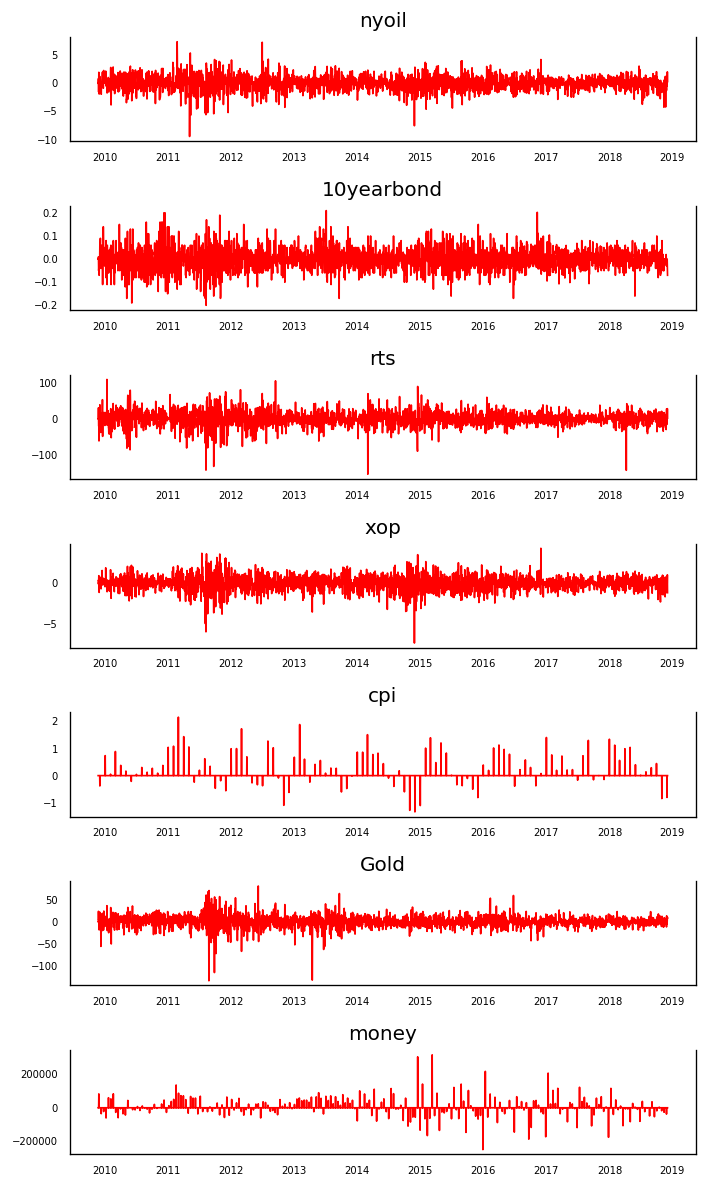

In [36]:
# Plot
fig, axes = plt.subplots(nrows=7, ncols=1, dpi=120, figsize=(6,10))
for i, ax in enumerate(axes.flatten()):
 data = detrend_data[detrend_data.columns[i]]
 ax.plot(data, color='red', linewidth=1)
# Decorations
 ax.set_title(detrend_data.columns[i])
 ax.xaxis.set_ticks_position('none')
 ax.yaxis.set_ticks_position('none')
 ax.spines['top'].set_alpha(0)
 ax.tick_params(labelsize=6)
plt.tight_layout();
plt.savefig('varplot1.png')

## Test the relationship cross the variable--Granger Causality Test 

In [37]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag = 12
test = "ssr_chi2test"
def grangers_causation_matrix(data, variables, test="ssr_chi2test", verbose=False):
    X_train = pd.DataFrame(np.zeros((len(variables),len(variables))), columns=variables, index=variables)
    for c in X_train.columns:
        for r in X_train.index:
            test_result=grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f"Y={r}, X ={c}, P Values = {p_values}")
            min_p_value = np.min(p_values)
            X_train.loc[r, c] =min_p_value
    X_train.columns = [var+'_x' for var in variables]
    X_train.index = [var+"_y" for var in variables]
    return X_train
grangers_causation_matrix(X_train, variables=X_train.columns)

D:\pythonprogram\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


,nyoil_x,10yearbond_x,rts_x,xop_x,cpi_x,Gold_x,money_x
nyoil_y,1.0000,0.4830,0.0859,0.0034,0.0793,0.0018,0.0480
10yearbond_y,0.0334,1.0000,0.1498,0.0877,0.1942,0.0224,0.7386
rts_y,0.0000,0.0026,1.0000,0.0000,0.0118,0.3987,0.0024
xop_y,0.0249,0.5466,0.1740,1.0000,0.0872,0.0140,0.1260
cpi_y,0.0021,0.2425,0.0376,0.4334,1.0000,0.0809,0.0307
Gold_y,0.0000,0.0000,0.0241,0.0028,0.0211,1.0000,0.0440
money_y,0.2186,0.5669,0.0077,0.0355,0.0133,0.4960,1.0000


## check the cointegrated, it would not have cointegrated after difference---Cointegrated test 

In [38]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(transform_data, alpha=0.05):
    out = coint_johansen(transform_data, -1, 5)
    d = {"0.90":0,"0.95":1,"0.99":2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1.0-alpha)]]
    def adjust(val, length=6):return str(val).ljust(length)
    
    print("Name  ::  Test Stat > C(95%)    =>   Signif  \n","--"*20)
    for col, trace, cvt in zip(transform_data.columns, traces, cvts):
        print(adjust(col), ":: ", adjust(round(trace,2), 9), ">", adjust(cvt, 8), " => ", trace> cvt)
        
cointegration_test(X_train)

Name  ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
nyoil  ::  123.8     > 111.7797  =>  True
10yearbond ::  76.35     > 83.9383   =>  False
rts    ::  44.51     > 60.0627   =>  False
xop    ::  27.54     > 40.1749   =>  False
cpi    ::  16.5      > 24.2761   =>  False
Gold   ::  9.77      > 12.3212   =>  False
money  ::  4.6       > 4.1296    =>  True


# Prediction

##  VAR model

In [39]:
import statsmodels.tsa.api as smt
from statsmodels.tsa.api import VAR
mod = smt.VAR(detrend_data)
res = mod.fit(maxlags=15, ic="aic")
print(res.summary())

D:\pythonprogram\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 29, Nov, 2019
Time:                     15:47:13
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    18.9799
Nobs:                     3300.00    HQIC:                   18.9134
Log likelihood:          -63867.5    FPE:                1.57725e+08
AIC:                      18.8764    Det(Omega_mle):     1.55074e+08
--------------------------------------------------------------------
Results for equation nyoil
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.008631         0.019566           -0.441           0.659
L1.nyoil             -0.068644         0.022570           -3.041           0.002
L1.10yearbond        -0.543297         0.514616           -1

##  Dutbin-Watson Statistic

In [40]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(res.resid)

for col, val in zip(detrend_data.columns, out):
    print((col), ':', round(val, 2))

nyoil : 2.0
10yearbond : 2.0
rts : 2.02
xop : 2.0
cpi : 2.0
Gold : 2.01
money : 2.0


In [41]:
pred = res.forecast(detrend_data.values[-3:], nobs)
pred_data = pd.DataFrame(pred, index = finaldata.index[-nobs:], columns = finaldata.columns)
pred_data

,nyoil,10yearbond,rts,xop,cpi,Gold,money
2018-12-05,-0.110884,0.002126,-4.637028,-0.019527,0.019219,2.981070,689.198299
2018-12-06,-0.001127,-0.000384,0.079475,-0.001103,0.010638,-0.265483,828.107010
2018-12-07,-0.007577,-0.000116,-0.092763,-0.001382,0.010574,0.062674,423.333408
2018-12-08,-0.007078,-0.000137,-0.084871,-0.001659,0.010585,0.027402,442.028179
2018-12-09,-0.007150,-0.000136,-0.086533,-0.001621,0.010579,0.030371,440.568129
2018-12-10,-0.007141,-0.000136,-0.086328,-0.001623,0.010579,0.030112,440.736898
2018-12-11,-0.007142,-0.000136,-0.086344,-0.001623,0.010579,0.030142,440.719255
2018-12-12,-0.007141,-0.000136,-0.086343,-0.001623,0.010579,0.030139,440.720963
2018-12-13,-0.007141,-0.000136,-0.086343,-0.001623,0.010579,0.030139,440.720812
2018-12-14,-0.007141,-0.000136,-0.086343,-0.001623,0.010579,0.030139,440.720826


In [42]:
pred_inverse = pred_data.cumsum()
f = pred_data.copy()
columns = X_train.columns
for col in columns:
    f[col] = X_train[col].iloc[-1] + pred_inverse[col]
#f = pred_inverse+X_test
print(f)

                nyoil  10yearbond          rts        xop         cpi  \
2018-12-05  53.139116    2.912126  1151.242972  32.700474  251.252219   
2018-12-06  53.137989    2.911742  1151.322448  32.699371  251.262857   
2018-12-07  53.130411    2.911626  1151.229685  32.697989  251.273431   
2018-12-08  53.123334    2.911490  1151.144814  32.696331  251.284016   
2018-12-09  53.116184    2.911354  1151.058281  32.694710  251.294595   
2018-12-10  53.109043    2.911218  1150.971953  32.693086  251.305174   
2018-12-11  53.101902    2.911082  1150.885609  32.691463  251.315754   
2018-12-12  53.094760    2.910947  1150.799266  32.689839  251.326333   
2018-12-13  53.087619    2.910811  1150.712922  32.688216  251.336912   
2018-12-14  53.080477    2.910675  1150.626579  32.686593  251.347492   
2018-12-15  53.073336    2.910540  1150.540236  32.684969  251.358071   
2018-12-16  53.066195    2.910404  1150.453892  32.683346  251.368650   
2018-12-17  53.059053    2.910268  1150.367549  32.

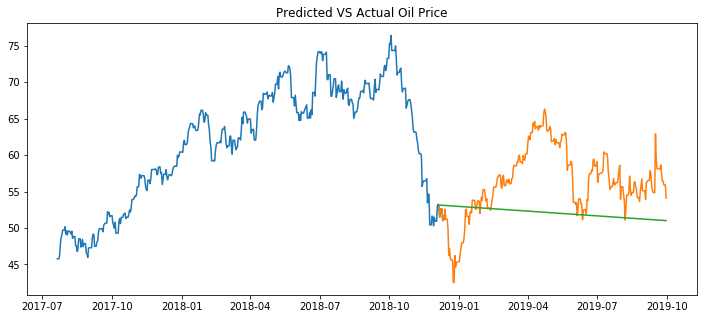

In [43]:
plt.figure(figsize=(12,5))
plt.plot(finaldata["nyoil"][2800:3310])
plt.plot(X_test["nyoil"])
plt.plot( f.nyoil)
plt.title("Predicted VS Actual Oil Price")
plt.savefig('Oil_VAR.png')

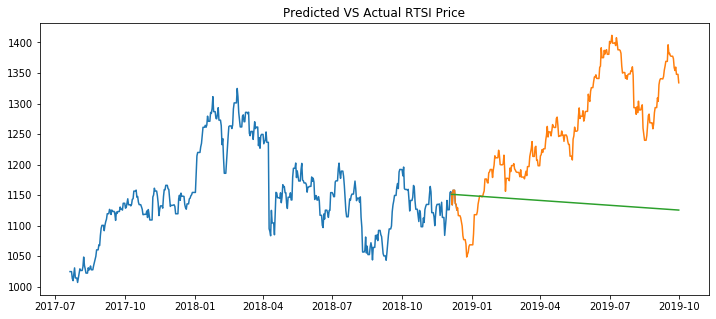

In [44]:
plt.figure(figsize=(12,5))
plt.plot(finaldata["rts"][2800:3310])
plt.plot(X_test["rts"])
plt.plot( f.rts)
plt.title("Predicted VS Actual RTSI Price")
plt.savefig('RTSI_VAR.png')

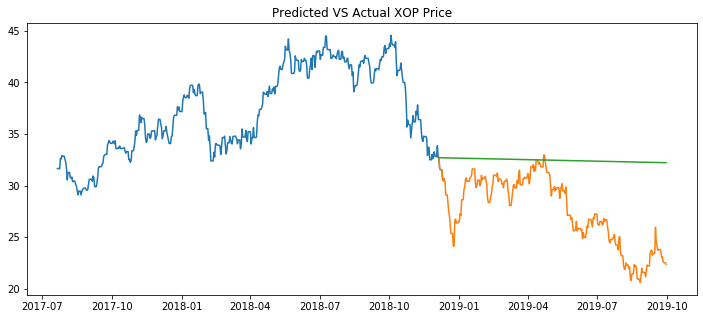

In [45]:
plt.figure(figsize=(12,5))
plt.plot(finaldata["xop"][2800:3310])
plt.plot(X_test["xop"])
plt.plot( f.xop)
plt.title("Predicted VS Actual XOP Price")
plt.savefig('XOP_VAR.png')

In [46]:
rms=np.sqrt(np.mean(np.power((np.array(X_test["xop"])-f.xop),2)))
rms

5.922664617053469

## Moving Average

In [47]:
preds = []
for i in range(0,len(X_test)):
    a = X_train['nyoil'][len(X_train)-nobs+i:].sum() + sum(preds)
    b = a/nobs
    preds.append(b)

pred_data_MA = pd.DataFrame(preds, index = finaldata.index[-nobs:])
pred_data_MA.head()


,0
2018-12-05,66.419900
2018-12-06,66.437466
2018-12-07,66.461591
2018-12-08,66.485797
2018-12-09,66.510083


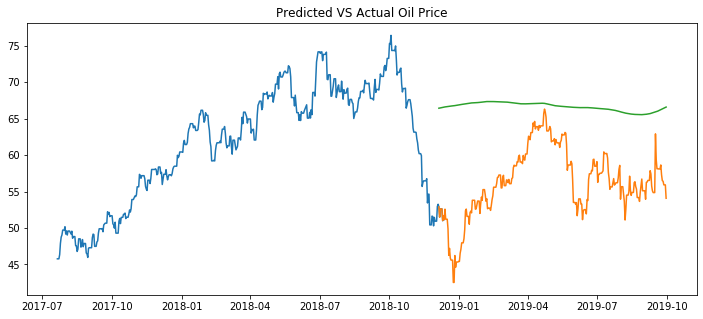

In [48]:
plt.figure(figsize=(12,5))
plt.plot(finaldata["nyoil"][2800:3310])
plt.plot(X_test["nyoil"])
plt.plot(pred_data_MA[0])
plt.title("Predicted VS Actual Oil Price")
plt.savefig('Oil_MovAve.png')

In [49]:
preds = []
for i in range(0,len(X_test)):
    a = X_train['rts'][len(X_train)-nobs+i:].sum() + sum(preds)
    b = a/nobs
    preds.append(b)
pred_data_MA['rts'] = preds


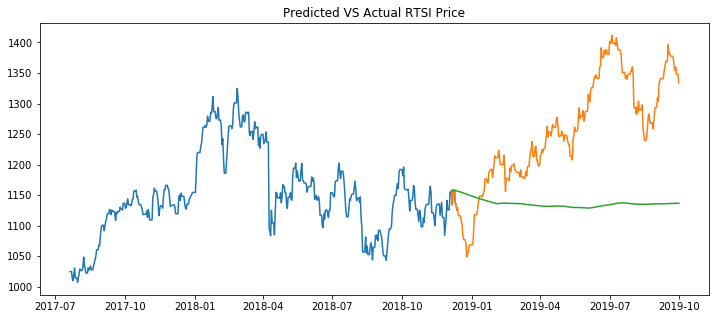

In [50]:
plt.figure(figsize=(12,5))
plt.plot(finaldata["rts"][2800:3310])
plt.plot(X_test["rts"])
plt.plot(pred_data_MA['rts'])
plt.title("Predicted VS Actual RTSI Price")
plt.savefig('RTSI_MovAve.png')

In [51]:
preds = []
for i in range(0,len(X_test)):
    a = X_train['xop'][len(X_train)-nobs+i:].sum() + sum(preds)
    b = a/nobs
    preds.append(b)
pred_data_MA['xop'] = preds

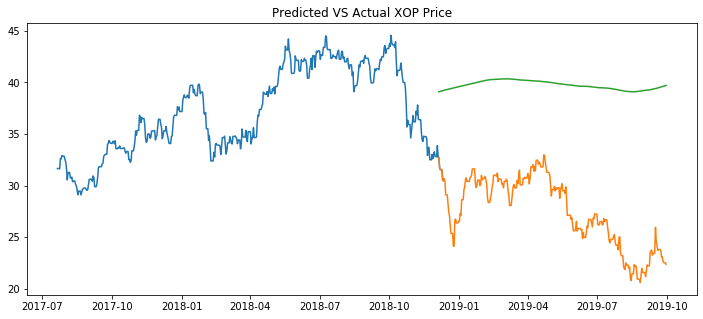

In [52]:
plt.figure(figsize=(12,5))
plt.plot(finaldata["xop"][2800:3310])
plt.plot(X_test["xop"])
plt.plot(pred_data_MA['xop'])
plt.title("Predicted VS Actual XOP Price")
plt.savefig('XOP_MovAve.png')

In [53]:
rms1=np.sqrt(np.mean(np.power((np.array(X_test["xop"])-pred_data_MA['xop']),2)))
rms1

12.603375512951093

## Linear Regression 

In [54]:
x_train = X_train.drop('nyoil', axis=1)
y_train = X_train['nyoil']
x_valid = X_test.drop('nyoil', axis=1)
y_valid = X_test['nyoil']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_valid)
#X_test['Pred_oil'] = preds
pred_data_LR = pd.DataFrame(preds, index = finaldata.index[-nobs:])
pred_data_LR.head()

,0
2018-12-05,59.269362
2018-12-06,57.662892
2018-12-07,57.461373
2018-12-08,57.461373
2018-12-09,57.461373


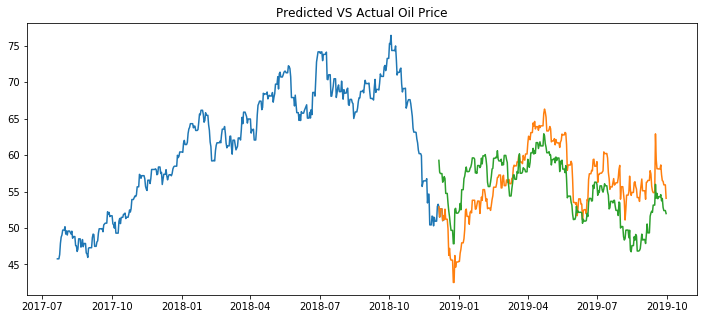

In [55]:
plt.figure(figsize=(12,5))
plt.plot(finaldata["nyoil"][2800:3310])
plt.plot(X_test["nyoil"])
plt.plot(pred_data_LR[0])
plt.title("Predicted VS Actual Oil Price")
plt.savefig('Oil_LinReg.png')

In [56]:
x_train = X_train.drop('rts', axis=1)
y_train = X_train['rts']
x_valid = X_test.drop('rts', axis=1)
y_valid = X_test['rts']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_valid)
pred_data_LR['rts'] = preds

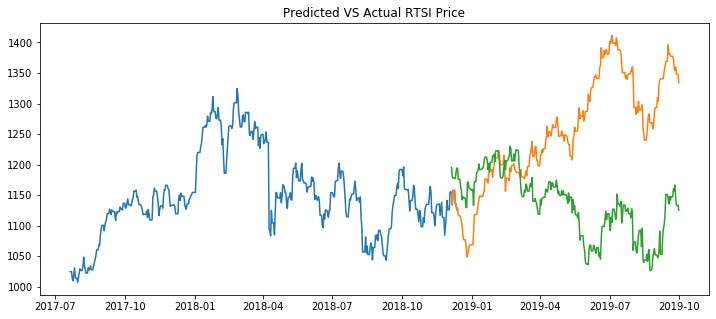

In [57]:
plt.figure(figsize=(12,5))
plt.plot(finaldata["rts"][2800:3310])
plt.plot(X_test["rts"])
plt.plot(pred_data_LR['rts'])
plt.title("Predicted VS Actual RTSI Price")
plt.savefig('RTSI_LinReg.png')

In [58]:
x_train = X_train.drop('xop', axis=1)
y_train = X_train['xop']
x_valid = X_test.drop('xop', axis=1)
y_valid = X_test['xop']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_valid)
pred_data_LR['xop'] = preds

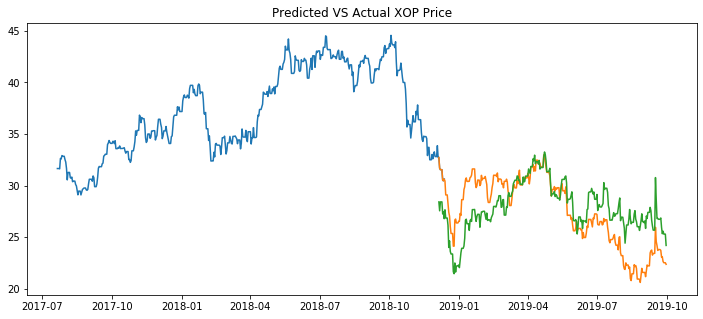

In [59]:
plt.figure(figsize=(12,5))
plt.plot(finaldata["xop"][2800:3310])
plt.plot(X_test["xop"])
plt.plot(pred_data_LR['xop'])
plt.title("Predicted VS Actual XOP Price")
plt.savefig('XOP_LinReg.png')

In [60]:
rms2=np.sqrt(np.mean(np.power((np.array(X_test["xop"])-pred_data_LR['xop']),2)))
rms2

2.865854083374517

## Long Short Term Memory 

In [61]:
from sklearn.preprocessing import MinMaxScaler
import keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, LSTM

ModuleNotFoundError: No module named 'keras'

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(finaldata["nyoil"])


In [ ]:
x_train, y_train = [], []
for i in range(60,len(X_train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

In [ ]:
#predicting 246 values, using past 60 from the train data
inputs = finaldata[len(finaldata) - len(X_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

x_test = []
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
pred_oil = model.predict(x_test)
pred_oil = scaler.inverse_transform(pred_oil)